In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
obvious_columns = [
#     'category_id',
 'views',
 'likes',
 'dislikes',
 'comment_count',
#  'pub_day_of_the_week',
#  'pub_day',
#  'pub_hour',
 'dislikes/likes',
 'likes/views',
 'dislikes/views',
 'comment_count/views',
#  'n_of_tags',
#  'title_length',
#  'title_n_of_words',
#  'title_capital_letters',
#  'title_capital_letters_percent',
#  'title_small_letters',
#  'title_small_letters_percent',
#  'title_punctuation',
#  'title_punctuation_percent',
#  'title_n_of_emojis',
#  'desc_length',
#  'desc_n_of_words',
#  'desc_capital_letters',
#  'desc_capital_letters_percent',
#  'desc_small_letters',
#  'desc_small_letters_percent',
#  'desc_punctuation',
#  'desc_punctuation_percent',
#  'desc_n_of_urls',
#  'desc_n_of_emojis',
#  'isFacebook',
#  'isTwitter',
#  'isInstagram',
#  'mean_h',
#  'mean_s',
#  'mean_v',
#  'std_h',
#  'std_s',
#  'std_v',
#  'entropy',
#  'avg_texts_coordX',
#  'avg_texts_coordY',
#  'ocr_sentiment_compound',
#  'Sad',
#  'Fear',
#  'Angry',
#  'Happy',
#  'Neutral',
#  'Surprise',
#  'people',
#  'faces',
#  'trending'
]

### Z outlierami

In [124]:
# df = pd.read_csv('../../our_data/Etap5/Etap3/all_for_FI.csv')
# scaler = pickle.load(open("../Etap5/scaler.pkl", 'rb'))

# del df['video_id']
# df = df.fillna(-1)
# print(df.shape)
# df[:3]

(16990, 54)


,category_id,views,likes,dislikes,comment_count,pub_day_of_the_week,pub_day,pub_hour,dislikes/likes,likes/views,...,ocr_sentiment_compound,Sad,Fear,Angry,Happy,Neutral,Surprise,people,faces,trending
0,10,0.522451,2.943601,0.007986,0.920714,1.779362,0.793851,-0.219590,-0.181688,-0.054449,...,-0.115386,-0.442328,-0.291643,-0.403087,-0.55375,-0.481588,-0.11798,2.872551,-0.781681,0
1,10,2.073490,8.162990,0.147273,4.719335,-1.471729,1.261720,0.231302,-0.177401,-0.229012,...,-0.115386,-0.442328,-0.291643,-0.403087,-0.55375,-0.481588,-0.11798,0.517372,-0.781681,0
2,10,1.214069,6.528692,0.137712,3.771792,-0.388032,0.325981,0.231302,-0.175135,-0.056146,...,-0.115386,-0.442328,-0.291643,-0.403087,-0.55375,-0.481588,-0.11798,1.348612,-0.781681,0


### Bez outlierów

In [8]:
df = pd.read_csv('../../our_data/Etap5/Etap3/all_for_FI_without_outliers.csv')
scaler = pickle.load(open("../Etap5/scaler_without_outliers.pkl", 'rb'))

del df['video_id']
df = df.fillna(-1)
print(df.shape)
df[:3]

(15445, 54)


,category_id,views,likes,dislikes,comment_count,pub_day_of_the_week,pub_day,pub_hour,dislikes/likes,likes/views,...,ocr_sentiment_compound,Sad,Fear,Angry,Happy,Neutral,Surprise,people,faces,trending
0,10,3.156279,6.860132,0.530014,3.044567,-1.478162,0.920080,0.222228,-0.247672,0.239150,...,-0.115615,-0.441187,-0.289289,-0.403271,-0.556994,-0.480048,-0.116932,0.939693,-0.781259,0
1,10,2.701422,7.622910,0.180755,4.367196,0.151210,-1.659686,0.222228,-0.253289,0.490361,...,-0.115615,-0.441187,-0.289289,-0.403271,-0.556994,1.142347,-0.116932,-0.452174,-0.246892,0
2,10,-0.178126,-0.392521,-0.443310,-0.437885,0.694334,-0.487065,-1.438592,-0.213505,-0.507029,...,1.507315,-0.441187,-0.289289,-0.403271,-0.556994,-0.480048,-0.116932,-0.591361,-0.781259,0


### Dzielenie zbioru

In [9]:
from sklearn.model_selection import train_test_split
# for col in df.columns:
#     temp = df[col].isna()
#     print(f"{col}:, {temp.any()} {temp.sum()}")

X_train, X_test, y_train, y_test = train_test_split(df.loc[:,~df.columns.isin(['trending'])], 
                                                    df['trending'], 
                                                    test_size=0.3,
                                                    random_state=42
                                                   )

print(f'X_train_unlabeled: ', X_train.shape)
print(f'y_train_unlabeled: ', y_train.shape)
print(f'X_test_unlabeled: ', X_test.shape)
print(f'y_test_unlabeled: ', y_test.shape)

X_train_unlabeled:  (10811, 53)
y_train_unlabeled:  (10811,)
X_test_unlabeled:  (4634, 53)
y_test_unlabeled:  (4634,)


### Uczenie

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

# parameters = [
#     {
#         'clf': (LogisticRegression(n_jobs=-1),),
#         'clf__max_iter': [100, 500, 1000],
#         'clf__solver': ['liblinear', 'lbfgs'],
#         'clf__C', [0.1, 1.0, 10.0]
#     },
#     {
#         'clf': (RandomForestClassifier(n_jobs=-1),),
#         'clf__n_estimators': [10, 100],
#         'clf__criterion': ['entropy', 'gini'],
#         'clf__max_depth': [None, 5, 10]
#     },
#     {
#         'clf': (SVC(),),
#         'clf__C', [0.1, 1.0, 10.0],
#         'kernel': ['linear', 'rbf']
#         'clf__criterion': ['entropy', 'gini'],
#         'clf__max_depth': [None, 5, 10]
#     }
# ]

parameters = {
    'LogisticRegression': [
        {
            'clf': (LogisticRegression(n_jobs=-1),),
            'clf__max_iter': [100, 500, 1000],
            'clf__solver': ['liblinear', 'lbfgs'],
            'clf__C': [0.1, 1.0, 10.0]
        }
    ],
    'RandomForestClassifier': [
        {
            'clf': (RandomForestClassifier(n_jobs=-1),),
            'clf__n_estimators': [10, 100],
            'clf__criterion': ['entropy', 'gini'],
            'clf__max_depth': [None, 5, 10]
        }
    ],
    'SVC': [
        {
            'clf': (SVC(),),
            'clf__C': [0.1, 1.0, 10.0],
            'clf__kernel': ['linear', 'rbf'],
        }
    ]
}

pipeline = Pipeline([
    ('clf', LogisticRegression()),
])

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
best_each_classifier = {}
for classifier_name, params in parameters.items():
    grid_search = GridSearchCV(estimator=pipeline, 
                               param_grid=params, 
                               scoring=scoring,
                               refit='Accuracy',
                               n_jobs=-1)

    clf = grid_search.fit(X_train, y_train)
    
    best_index = clf.best_index_
    best_each_classifier[classifier_name] = {
        'mean_accuracy': clf.cv_results_['mean_test_Accuracy'][best_index],
        'mean_AUC': clf.cv_results_['mean_test_AUC'][best_index],
        'std_accuracy': clf.cv_results_['std_test_Accuracy'][best_index],
        'std_AUC': clf.cv_results_['std_test_AUC'][best_index],
        'estimator': clf.best_estimator_,
    }
    
pickle.dump(best_each_classifier, open('./results.pkl', 'wb'))

/home/lilatee/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


In [4]:
best_each_classifier = pickle.load(open('./results.pkl', 'rb'))

### LogisticRegression

In [86]:
print(f"Accuracy mean: { best_each_classifier['LogisticRegression']['estimator']['clf']}")
print(f"Accuracy mean: {best_each_classifier['LogisticRegression']['mean_accuracy']}")
print(f"Accuracy std: {best_each_classifier['LogisticRegression']['std_accuracy']}")
print(f"AUC mean: {best_each_classifier['LogisticRegression']['mean_AUC']}")
print(f"AUC std: {best_each_classifier['LogisticRegression']['std_AUC']}")

estimator = best_each_classifier['LogisticRegression']['estimator']['clf']

log_odds = np.exp(estimator.coef_[0])
pd.DataFrame(log_odds, 
             X_test.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)


# Przykład mamy 4.678 razy większą szansę na bycie w klasie 1 niż w klasie 0 za każdy jednostkowy wzrost wartości likes/views

Accuracy mean: 0.7435020825822223
Accuracy std: 0.004588274135253091
AUC mean: 0.8205963384992658
AUC std: 0.006861497115503511


,coef
desc_small_letters,82.721750
likes/views,4.678088
desc_n_of_words,4.406580
desc_capital_letters,3.589647
desc_n_of_urls,1.899004
dislikes,1.768028
dislikes/likes,1.668635
comment_count,1.596405
desc_punctuation,1.250208
avg_texts_coordY,1.167401


#### SHAP

In [27]:
# %pip install alibi[shap]

In [13]:
from alibi.explainers import KernelShap
import shap
from scipy.special import logit
# HALO tutaj wybieram tak losowo 5 drzewo, no bo jak inaczej?
estimator = best_each_classifier['LogisticRegression']['estimator']['clf']



shap.initjs()
explainer = KernelShap(estimator.predict_proba, link='logit')
explainer.fit(shap.sample(X_train, 5))
mean_scores_train = logit(estimator.predict_proba(X_train).mean(axis=0))
print(mean_scores_train - explainer.expected_value)

lr_explanation = explainer.explain(X_test, l1_reg=False)

# obtain shap values for the test data
# shap_values = explainer.shap_values(X_test) 

# shap.summary_plot(shap_values[0], X_test)
shap.summary_plot(lr_explanation.shap_values[0], X_test, X_test.columns)

[ 0.26223666 -0.26223666]


  0%|          | 0/4634 [00:00<?, ?it/s]

ZeroDivisionError: float division by zero

### RandomForestClassifier

In [108]:
from sklearn.tree import export_graphviz
from graphviz import Source
import graphviz

print(f"Accuracy mean: {best_each_classifier['RandomForestClassifier']['estimator']['clf']}")
print(f"Accuracy mean: {best_each_classifier['RandomForestClassifier']['mean_accuracy']}")
print(f"Accuracy std: {best_each_classifier['RandomForestClassifier']['std_accuracy']}")
print(f"AUC mean: {best_each_classifier['RandomForestClassifier']['mean_AUC']}")
print(f"AUC std: {best_each_classifier['RandomForestClassifier']['std_AUC']}")

# HALO tutaj wybieram tak losowo 5 drzewo, no bo jak inaczej?
estimator = best_each_classifier['RandomForestClassifier']['estimator']['clf'].estimators_[5]


# Save png
exp_graph = export_graphviz(estimator, out_file=None, 
                feature_names = X_test.columns,
                class_names = ['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
graph = Source(exp_graph)
graph.format = 'png'
graph.render('dtree_render')

Accuracy mean: RandomForestClassifier(criterion='entropy', n_jobs=-1)
Accuracy mean: 0.8068645023550136
Accuracy std: 0.006456942621053099
AUC mean: 0.8909965583077606
AUC std: 0.005601641492103354


'dtree_render.png'

#### SHAP

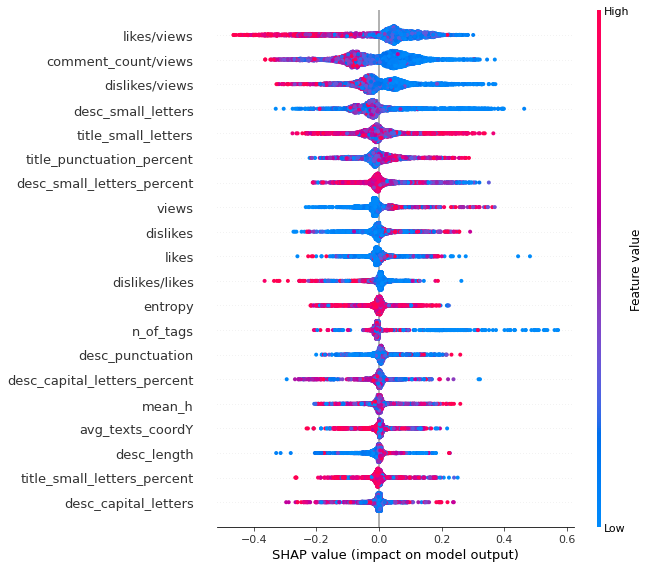

In [28]:
# HALO tutaj wybieram tak losowo 5 drzewo, no bo jak inaczej?
estimator = best_each_classifier['RandomForestClassifier']['estimator']['clf'].estimators_[5]

shap.initjs()
explainer = shap.TreeExplainer(estimator)
# obtain shap values for the test data
shap_values = explainer.shap_values(X_test) 
shap.summary_plot(shap_values[0], X_test)
# shap.summary_plot(shap_values[1], X_test)

### SVC

In [9]:
import seaborn as sns
import shap

print(f"Accuracy mean: {best_each_classifier['SVC']['estimator']['clf']}")
print(f"Accuracy mean: {best_each_classifier['SVC']['mean_accuracy']}")
print(f"Accuracy std: {best_each_classifier['SVC']['std_accuracy']}")
print(f"AUC mean: {best_each_classifier['SVC']['mean_AUC']}")
print(f"AUC std: {best_each_classifier['SVC']['std_AUC']}")

estimator = best_each_classifier['SVC']['estimator']['clf']

shap.initjs()
explainer = shap.KernelExplainer(estimator.decision_function, data=shap.sample(X_test, 5))
# obtain shap values for the test data
# TODO przydałoby się chyba zwiększyć te k, i wyżej też jest shap.sample(X_test, 5) - też nwm czy 5 nie za mało, ale długo się robi
k = 100
shap_values = explainer.shap_values(X_test[:k]) 

Accuracy mean: SVC(C=10.0)
Accuracy mean: 0.7619097229795703
Accuracy std: 0.005924790578815786
AUC mean: 0.8419401436324785
AUC std: 0.006949211565227907


  0%|          | 0/100 [00:00<?, ?it/s]

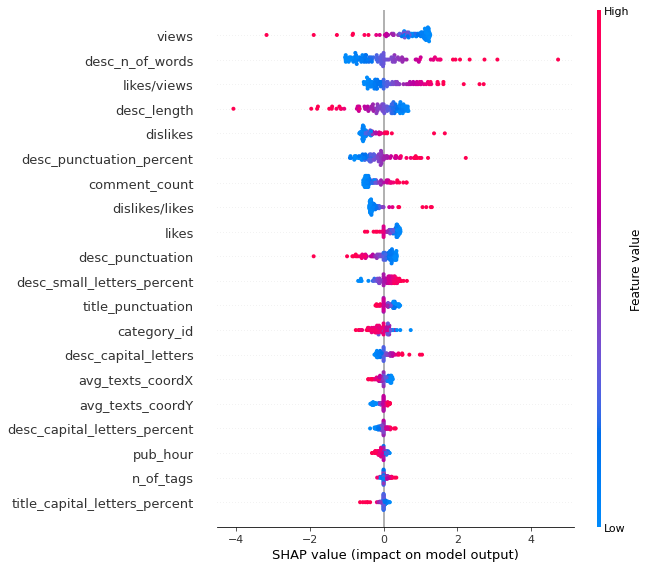

In [15]:
shap.summary_plot(shap_values, X_test[:k])

In [7]:
import seaborn as sns
import shap

model = clf.best_estimator_['clf']

shap.initjs()
explainer = shap.TreeExplainer(model)

# obtain shap values for the test data
shap_values = explainer.shap_values(X_test)

# i = 10
# shap_values = explainer.shap_values(X_test.iloc[i])
# shap.force_plot(explainer.expected_value[i], shap_values[i], X_test.iloc[i]) 

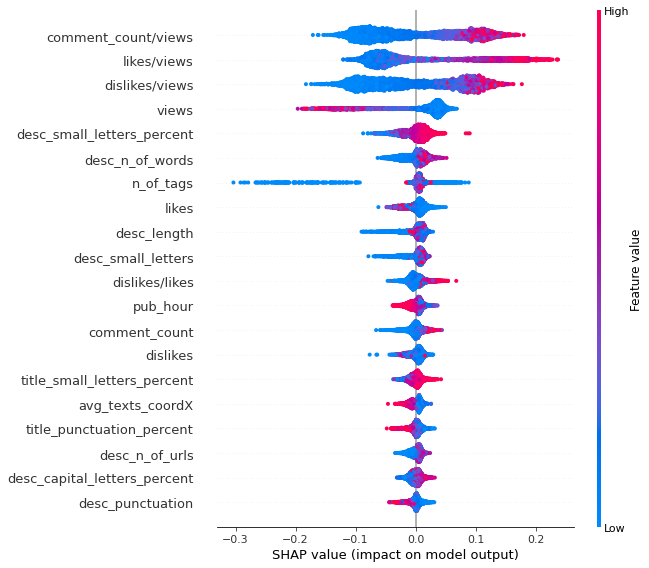

In [8]:
shap.summary_plot(shap_values[1], X_test, class_names=model.classes_)

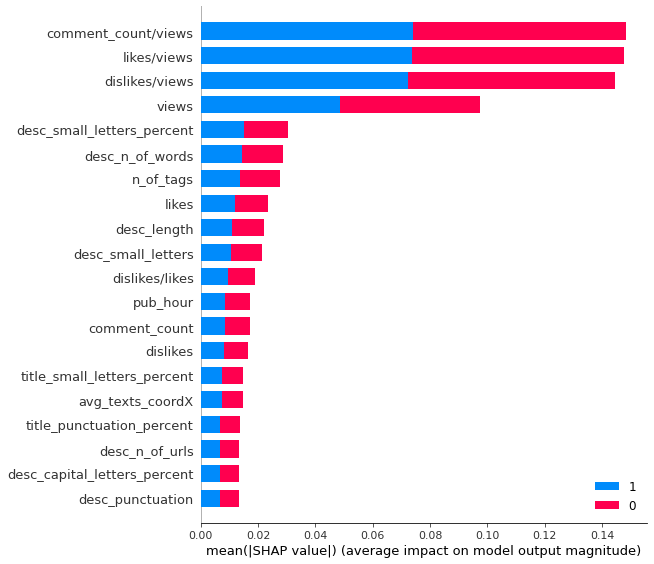

In [15]:
shap.summary_plot(shap_values, X_test, class_names=model.classes_)

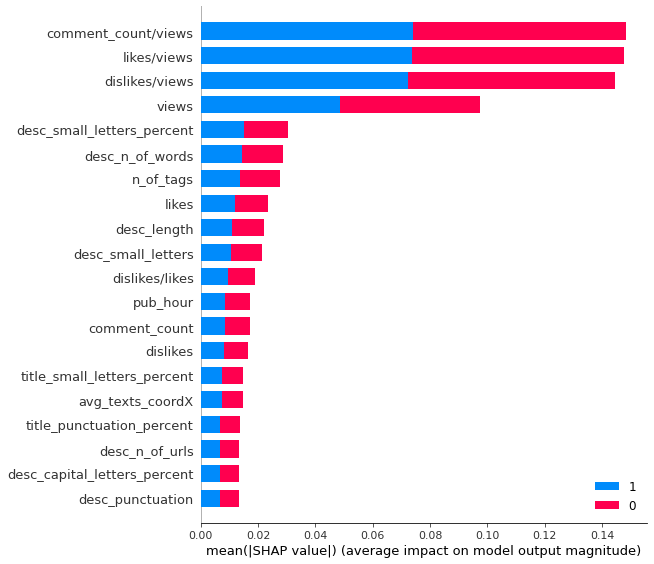

In [14]:
shap.summary_plot(shap_values, X_test, plot_type='bar', class_names=model.classes_)

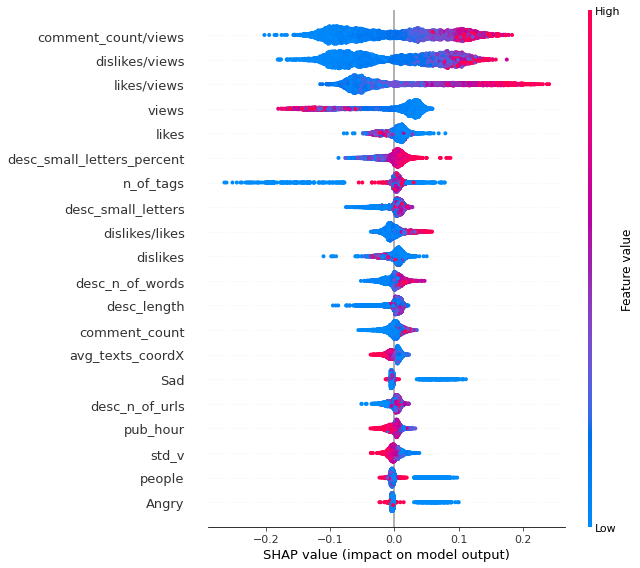

In [149]:
shap.summary_plot(shap_values[1], X_test)

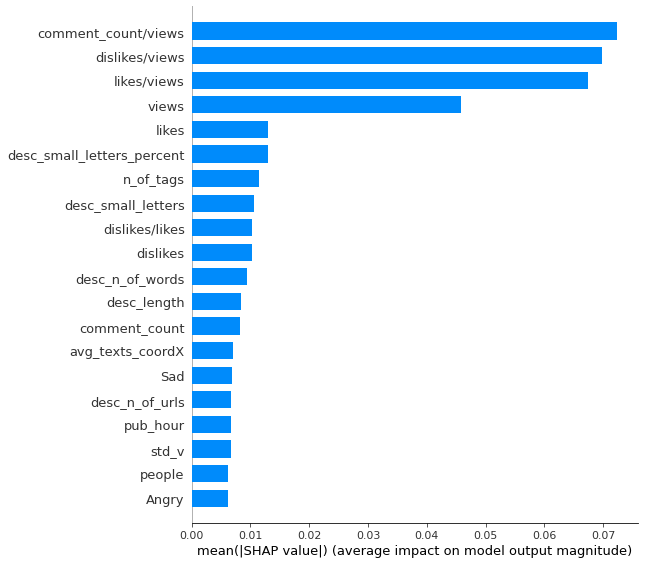

In [150]:
shap.summary_plot(shap_values[1], X_test, plot_type='bar')

### Bez outlierów

In [112]:
df = pd.read_csv('../../our_data/Etap5/Etap3/all_for_FI_without_outliers.csv')
scaler = pickle.load(open("../Etap5/scaler_without_outliers.pkl", 'rb'))

del df['video_id']
df = df.fillna(-1)
print(df.shape)
df[:3]